In [1]:
import os, sys

import numpy as np
import pandas as pd

from os.path import join

from ikmeans import IKMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pwd = os.getcwd()
data_dir = join(pwd, 'data/')
need_normalization = False
need_standardization = True
need_pca = True
filename = 'iris.csv'
datapath = join(data_dir, filename)
num_comps = 2
num_clusters = 5
num_iterations = 50

In [3]:
# f = open('data/data.csv')
# lines = f.read()
# print(type(lines))
# new_lines = ''
# for line in lines:
#     new_lines += str(line.encode('utf-8').strip())
# print(len(new_lines))

In [4]:
df = pd.read_csv(datapath, low_memory=False, encoding='utf-8')

In [5]:
print(len(df))

150


In [6]:
print(df.head())

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


In [7]:
print(df.dtypes)

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object


In [8]:
columns = df.columns.tolist()
cols = columns
# cols = columns[1:]
# cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Fare']
# cols = columns[:-1]
# cols = ['Passenger Count', 'Adjusted Passenger Count']
# cols = columns[1:]
cols = columns[2:]
df = df[cols]
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.fillna(0)
df = df.replace([-np.inf, np.inf], np.nan)
df = df.dropna()
df = df.loc[:, (df != 0).any(axis=0)]
print(len(df))
print(df.dtypes)

150
petal.length    float64
petal.width     float64
dtype: object


In [9]:
df = df.sample(
    frac=1.0,
    random_state=1,
)
df = df.reset_index(drop=True)

In [10]:
if need_normalization is True:
    normalizer = StandardScaler()
    tmp = normalizer.fit_transform(df)
    df = pd.DataFrame(tmp, columns=df.columns)
elif need_standardization is True:
    scaler = MinMaxScaler()
    tmp = scaler.fit_transform(df)
    df = pd.DataFrame(tmp, columns=df.columns)

In [11]:
X = df
if need_pca is True:
    pca = PCA(
        n_components=num_comps,
        svd_solver='auto',
    )
    X = pca.fit_transform(X)
else:
    X = X.to_numpy()

In [12]:
for x in X:
    for a in x:
        if np.isinf(a):
            print(x)

In [13]:
data = X
print(data[:5])
print(data.shape)

[[-0.6003402   0.03074136]
 [-0.11814768  0.06526777]
 [ 0.13544788 -0.02202456]
 [-0.52801058  0.07546432]
 [ 0.54977428 -0.0978081 ]]
(150, 2)


In [14]:
models = ['ikmeans', 'kmeans']
inits = {
    'kmeans': 'k-means++',
    'ikmeans': 'ikmeans',
}

In [15]:
ikmeans = IKMeans(
    n_clusters=num_clusters,
    max_iter=num_iterations,
    verbose=0,
    init = 'ikmeans',
)

In [16]:
kmeans = IKMeans(
    n_clusters=num_clusters,
    max_iter=num_iterations,
    init='kmeans',
#     algorithm='auto',
#     n_init=50,
    verbose=0,
)

In [17]:
algorithms = {
    'kmeans': kmeans,
    'ikmeans': ikmeans,
}

0.9738966071298919


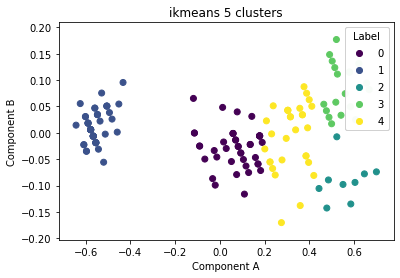

[ 0.12830329 -0.0752614 ] [[0.38726102 0.0750939 ]]
[0.14259246 0.03121227] [[ 0.38726102  0.0750939 ]
 [ 0.12830329 -0.0752614 ]]
[0.57835263 0.11513926] [[ 0.38726102  0.0750939 ]
 [ 0.12830329 -0.0752614 ]
 [ 0.14259246  0.03121227]]
[-0.57712403  0.00604107] [[ 0.38726102  0.0750939 ]
 [ 0.12830329 -0.0752614 ]
 [ 0.14259246  0.03121227]
 [ 0.57835263  0.11513926]]
0.853861735391225


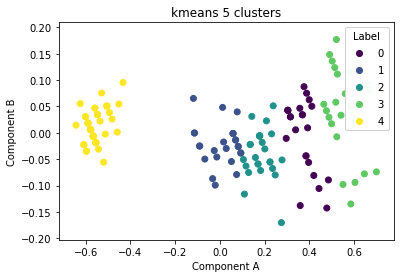

In [18]:
for model in models:
    algorithm = algorithms[model].fit(data)
    centers = algorithm.cluster_centers_
    labels = algorithms[model].predict(data)
    fig, ax = plt.subplots()
    print((algorithms[model].inertia_))
    scatter = plt.scatter(
        X[:, 0],
        X[:, 1],
        c=labels,
    )
    handles, labels = scatter.legend_elements()
    legend = ax.legend(
        handles,
        labels,
        loc='upper right',
        title='Label',
    )
    ax.add_artist(legend)
    plt.title(model+' '+str(num_clusters)+ ' clusters')
    plt.xlabel('Component A')
    plt.ylabel('Component B')
    plt.show()